In [1]:
import re 
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
audio="/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"


folders_main=os.listdir(audio)

In [3]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [4]:
y, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav')
yt,_=librosa.effects.trim(y)
y=yt

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


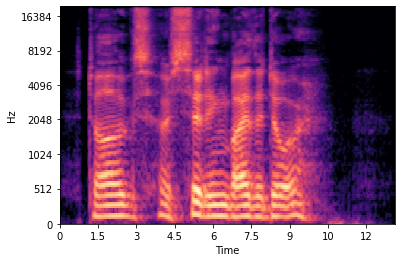

In [5]:
mel_spect = librosa.feature.melspectrogram(y=yt, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');

In [6]:
# EXTRACT LOG-MEL SPECTROGRAMS OF EACH AUDIO FILE AND SAVE TO FOLDER

# counter=0
# for folders in folders_main :
#     path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
#     files_sub=os.listdir(path_in)
#     for file in files_sub :
#         numbers = re.findall('\d+',file)
#         emotion=dicts[numbers[2]]
#         print(numbers[6],emotion)
#         path_save='/Users/murielkosaka/Desktop/capstone_project/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
#         path_load='{0}/{1}'.format(path_in,file)
#         y, sr = librosa.load(path_load)
#         yt,_=librosa.effects.trim(y)
#         y=yt
#         mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
#         mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
#         librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
#         plt.savefig(path_save)

In [7]:
from fastai.vision import *


ModuleNotFoundError: No module named 'fastai'

In [ ]:
conda install -c pytorch -c fastai fastai


In [3]:
path=Path('/Users/murielkosaka/Desktop/capstone_project/sorted_data')

In [5]:
path.ls

<bound method <lambda> of PosixPath('/Users/murielkosaka/Desktop/capstone_project/sorted_data')>

In [6]:
??get_transforms


In [7]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=5)

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=144, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes


['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

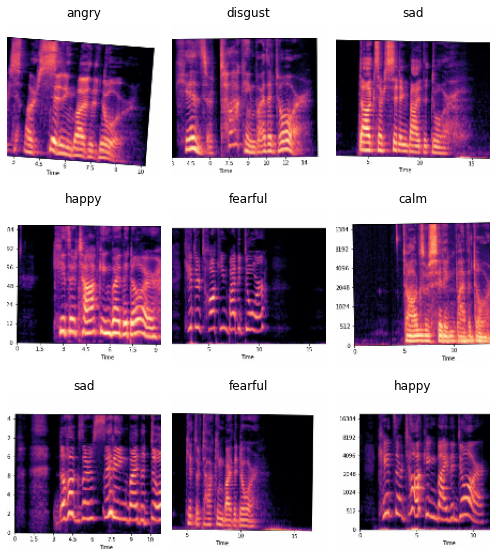

In [10]:
data.show_batch(rows=3, figsize=(7,8))


In [11]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/murielkosaka/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,accuracy,time
0,3.146177,2.252221,0.284722,03:20
1,2.769732,1.869954,0.392361,03:28
2,2.450353,1.739558,0.364583,03:22
3,2.215499,1.724043,0.427083,02:43
4,2.067100,1.688877,0.430556,02:38


In [13]:
learn.unfreeze()


In [ ]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


In [ ]:

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


In [ ]:

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=288, num_workers=4).normalize(imagenet_stats)
data.batch_size=25

In [ ]:
learn.data=data
data.train_ds[0][0].shape

In [ ]:
data.classes


In [ ]:
data.show_batch(rows=3, figsize=(7,8))


In [ ]:
learn.freeze()


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-4))


In [ ]:
learn.unfreeze()


In [ ]:

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5,1e-4))


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-4))


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5))


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, slice(1e-5,1e-4))


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
